# imorting the dependencies

In [1]:
import numpy as np
import pandas as pd
import difflib
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  

In [2]:
#loading the data from the csv file to pandas dataframe
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

C:\Users\Harsh raj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


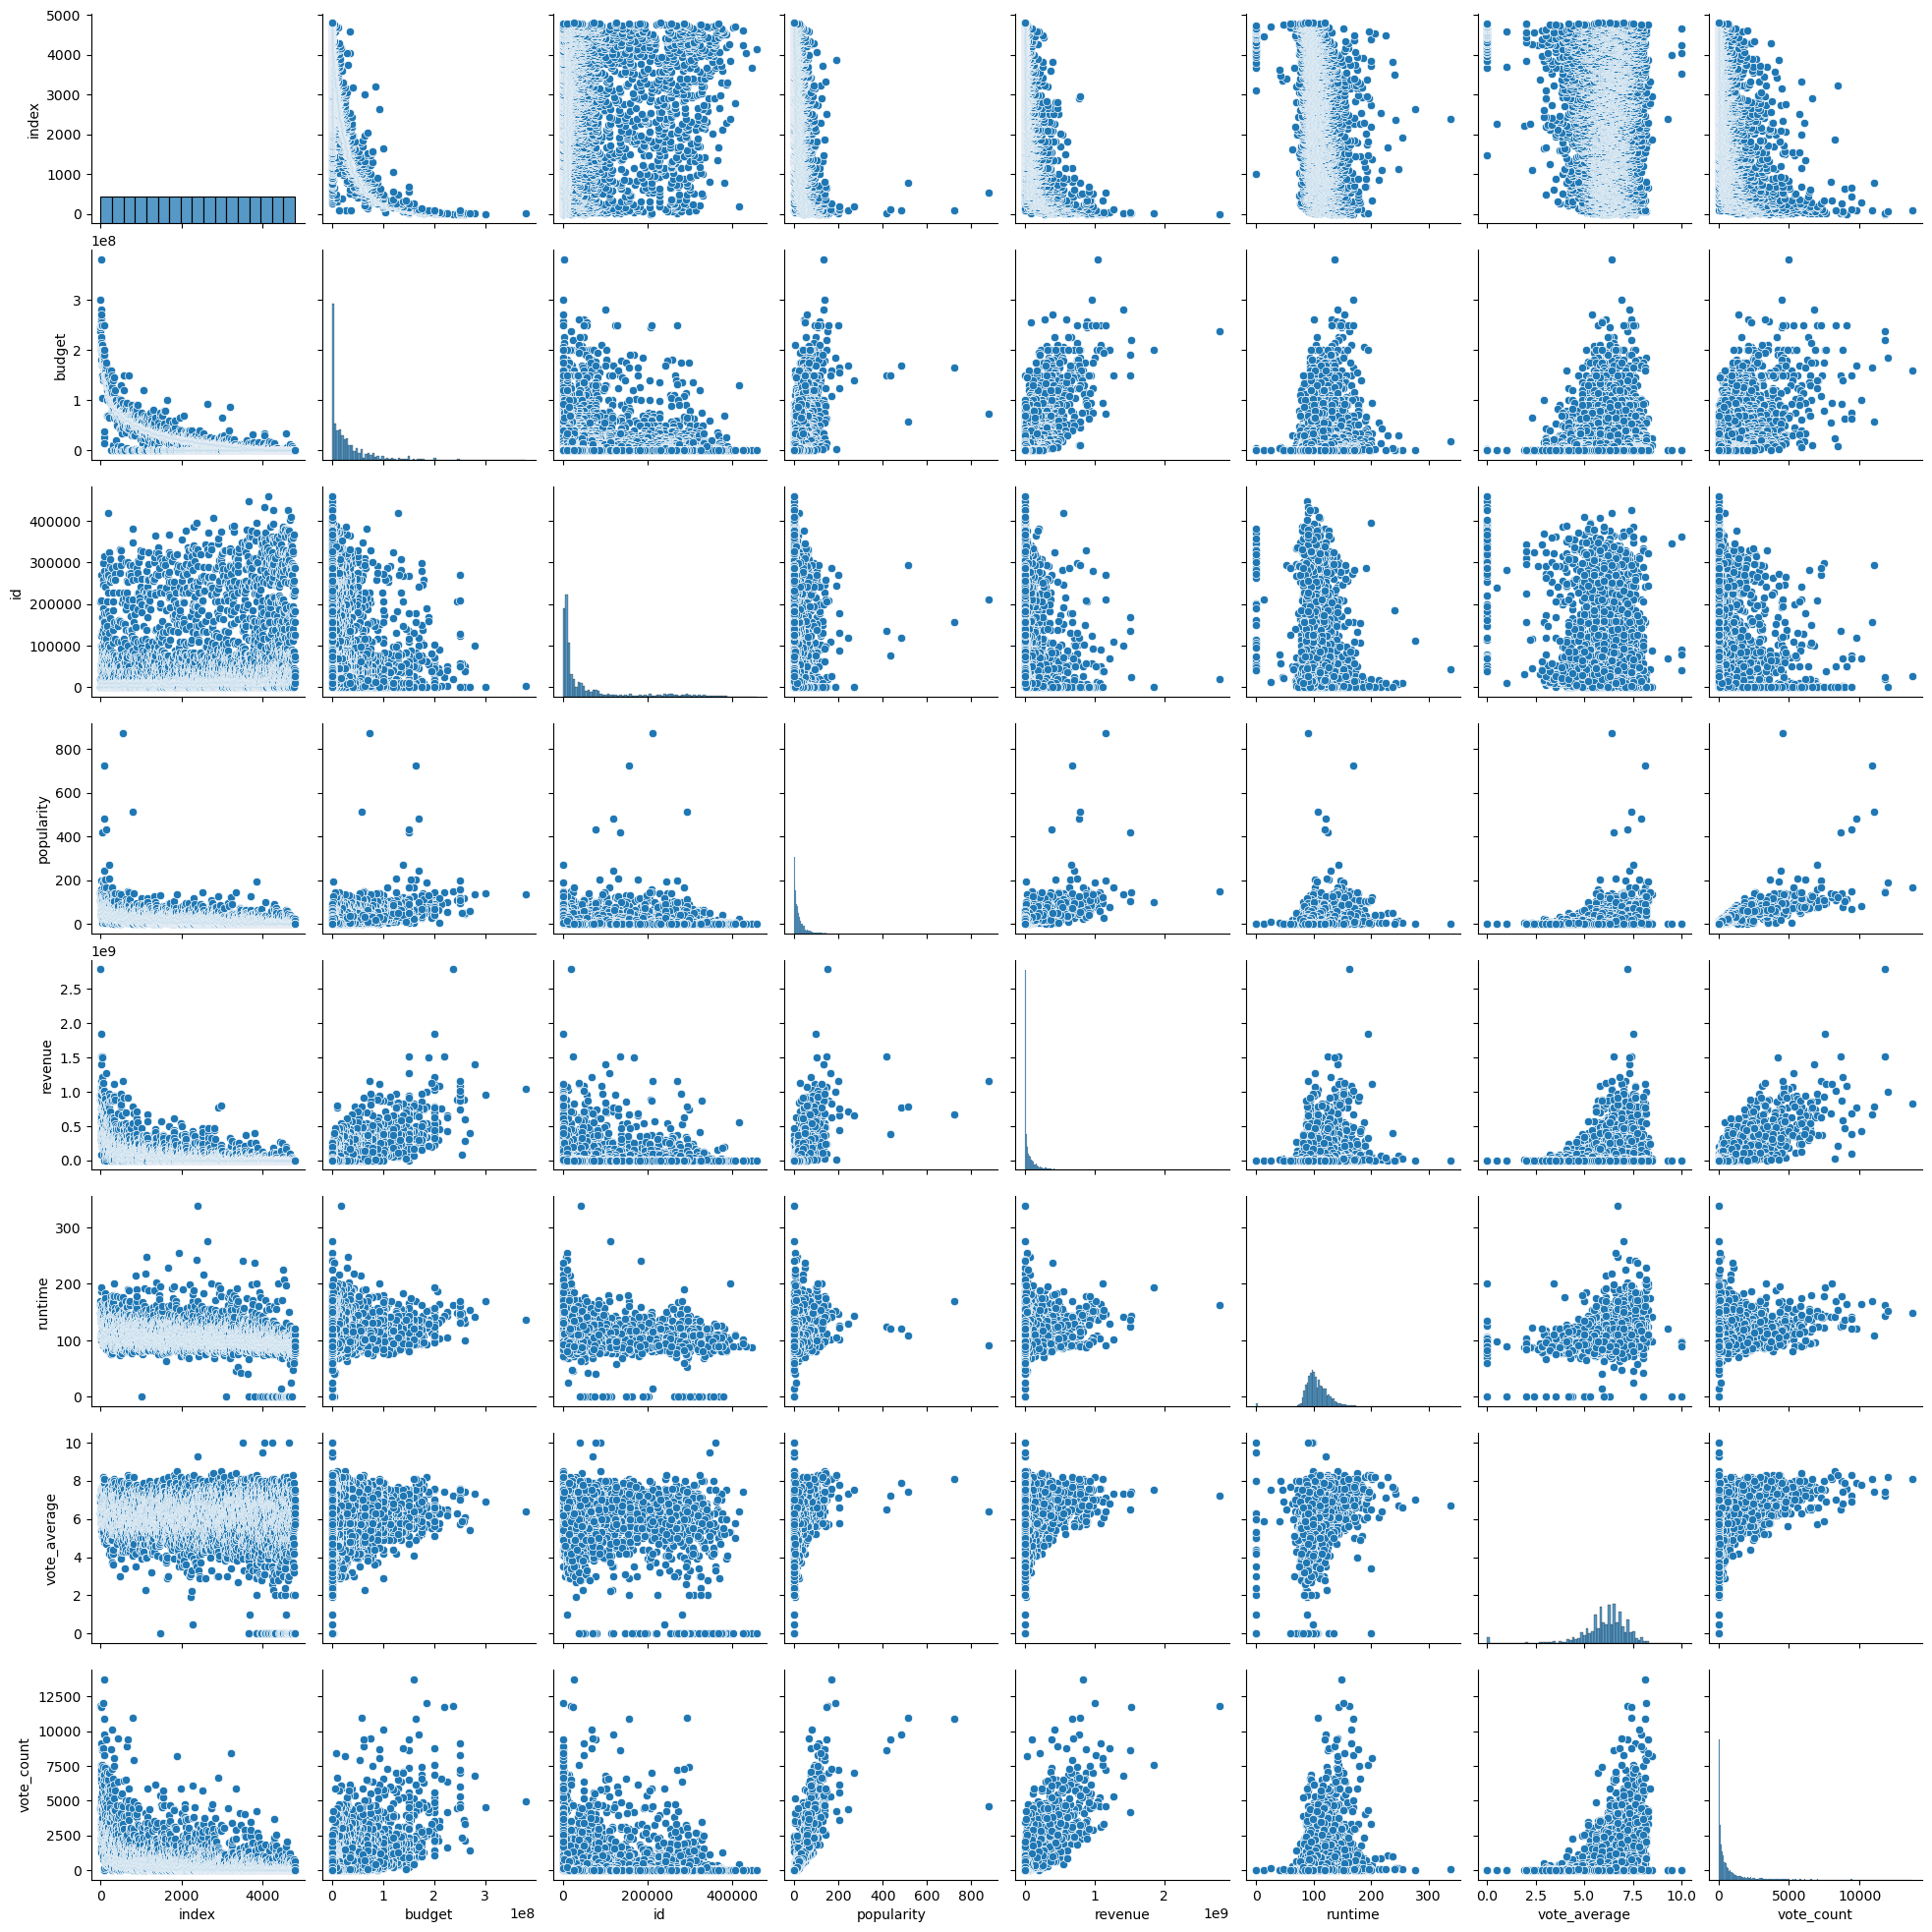

In [38]:
sns.pairplot(df)

In [5]:
#number of rows mand data in file
df.shape

(4803, 24)

In [6]:
#selecting the relevant feature for recommendation
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [7]:
#replacing the null values with null string

for features in selected_features:
    df[features] = df[features].fillna('')

In [8]:
# combining all the 5 selected features

combined_features = df['genres']+' '+df['keywords']+' '+df['tagline']+' '+df['cast']+' '+df['director']

In [9]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [10]:
# converting the text data to feature vector

vectorizer = TfidfVectorizer()

In [11]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [12]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [13]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

<Axes: xlabel='genres', ylabel='Count'>

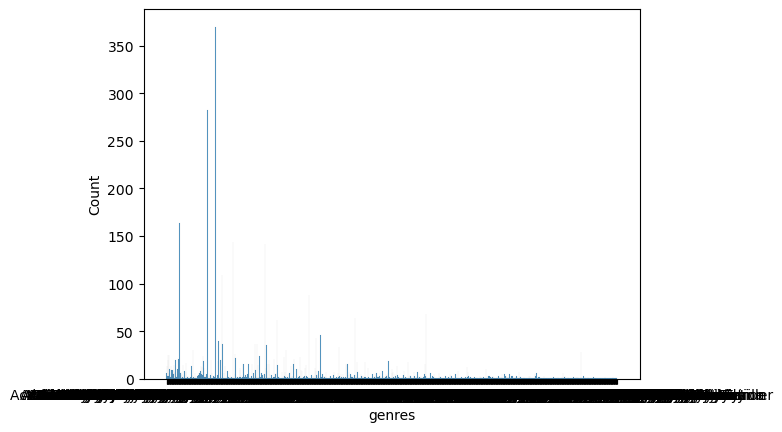

In [14]:
sns.histplot(df['genres'])

<Axes: xlabel='keywords', ylabel='Count'>

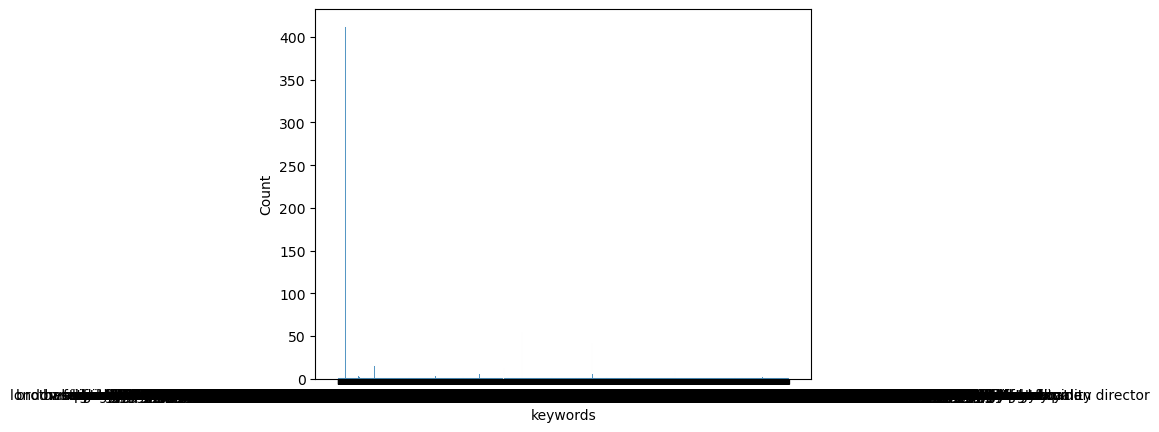

In [39]:
sns.histplot(df['keywords'])

# cosine similarity

In [15]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [16]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [17]:
print(similarity.shape)

(4803, 4803)


In [18]:
# getting the movie name from the user

movie_name = input('Enter your favourite movie name:')

Enter your favourite movie name:Avatar


In [19]:
#creating a list with all movies name from the dataset

list_of_all_titles = df['title'].tolist()

In [20]:
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [21]:
# finding the close match from the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Avatar']


In [22]:
close_match = find_close_match[0]
print(close_match)

Avatar


In [23]:
# finding the index of the movie with title

index_of_the_movie = df[df.title == close_match]['index'].values[0]
print(index_of_the_movie)

0


In [24]:
# getting a list of the similar movie on the index value

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)
similarity_score.shape()

[(0, 1.0000000000000002), (1, 0.07219486822992491), (2, 0.03773299957717928), (3, 0.012520204623868908), (4, 0.10702574467235304), (5, 0.07786899789424222), (6, 0.008237143013608844), (7, 0.03613473061484884), (8, 0.02960930964063025), (9, 0.02628716743995174), (10, 0.09261074046755373), (11, 0.012717759249124133), (12, 0.027217360083100117), (13, 0.02956975252334751), (14, 0.06915925473724742), (15, 0.01955159449930903), (16, 0.03426340578061641), (17, 0.026036564614294145), (18, 0.057147592666724124), (19, 0.0389505953521203), (20, 0.03971480215415495), (21, 0.01201480380565613), (22, 0.03043869426198959), (23, 0.045926535588179496), (24, 0.04623989017965259), (25, 0.042849260959502256), (26, 0.07010711150614286), (27, 0.037198076232328854), (28, 0.04083909796927843), (29, 0.03858648330156397), (30, 0.07893753610792024), (31, 0.060555221380551486), (32, 0.030362745635800832), (33, 0.03591021470068869), (34, 0.0), (35, 0.03769674103474844), (36, 0.048910879509114234), (37, 0.085751739

AttributeError: 'list' object has no attribute 'shape'

In [25]:
len(similarity_score)

4803

In [26]:
# sortinf the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(0, 1.0000000000000002), (3158, 0.24946766307532411), (2403, 0.24841462595906275), (94, 0.24505931974059814), (56, 0.2037806964828543), (47, 0.20115287461144912), (1053, 0.19702752258651426), (838, 0.18017023369312357), (3730, 0.17646241185313413), (4593, 0.1744884579741517), (239, 0.17441748680810654), (1531, 0.1682605817219649), (2696, 0.16503460259176522), (812, 0.1606230190749179), (643, 0.15644455512484967), (4401, 0.15468923545220403), (2198, 0.15217161971893786), (770, 0.15025726727753488), (1951, 0.14933372705282924), (2229, 0.14661801285492257), (1922, 0.1448197430191312), (206, 0.14226144606175545), (3208, 0.1401230206493547), (1759, 0.13899056016968867), (43, 0.1348209130228474), (1473, 0.13476547670086914), (278, 0.13291021545504), (158, 0.13252892131627672), (1650, 0.13024318650645417), (1275, 0.12602216304791153), (3439, 0.12480340331169382), (661, 0.12153002734138185), (3202, 0.12144749322246053), (4332, 0.12002556168548507), (3105, 0.11948466494212534), (775, 0.1184706

In [27]:
# print the name of similar movies based on the index

print('Movies suggested for you: \n')
i = 1
for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = df[df.index==index]['title'].values[0]
    if (i<=10):
        print(i,'.',title_from_index)
        i+=1

Movies suggested for you: 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies


# movie recommendation system

In [28]:
movie_name = input('Enter your favourite movie name:')

list_of_all_titles = df['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = df[df.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you: \n')
i = 1
for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = df[df.index==index]['title'].values[0]
    if (i<=10):
        print(i,'.',title_from_index)
        i+=1

Enter your favourite movie name:Avatar
Movies suggested for you: 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies


In [30]:
x=list_of_all_titles.index('Avatar')

In [31]:
y=list_of_all_titles.index('Alien')

In [32]:
similarity[x][y]

0.24946766307532411

In [37]:
# print the name of similar movies based on the index

print('Movies suggested for you: \n')
i = 1
for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = df[df.index==index]['title'].values[0]
    if (i<=10):
        x=list_of_all_titles.index(movie_name)
        y=list_of_all_titles.index(title_from_index)
        z=similarity[x][y]
        print(i,'.',title_from_index,' ',z)
        i+=1

Movies suggested for you: 

1 . Avatar   1.0000000000000002
2 . Alien   0.24946766307532411
3 . Aliens   0.24841462595906275
4 . Guardians of the Galaxy   0.24505931974059814
5 . Star Trek Beyond   0.2037806964828543
6 . Star Trek Into Darkness   0.20115287461144912
7 . Galaxy Quest   0.19702752258651426
8 . Alien³   0.18017023369312357
9 . Cargo   0.17646241185313413
10 . Trekkies   0.1744884579741517
